# Stock Market Data Analysis

Stock Market Analysis and Visualisation is the project related to Exploratory data analysis(EDA), Data visualization and Predictive analysis using data, provided by Yahoo Finance. I looked at real-time financial data from the stock market and have used python libraries to get stock information, visualize different aspects of it, and finally I worked at a few ways of analyzing the risk of a stock, based on its previous performance history. I have also used statistical method called Monte Carlo Method to predict future stock prices.


### 1. Basic Analysis of Stock Information
In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [89]:
#Let's go ahead and start with some python library imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [90]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [91]:
# For reading stock data from Yahoo Finance
import yfinance as yf
# For time stamps
from datetime import datetime
# For division
from __future__ import division

Let's use Yahoo Finance and Pandas to grab some data for some company stocks from different sectors.
* AAPL - Apple (Information Technology Sector)
* CVX - Chevron (Energy Sector)
* BA - Boeing (Industrials Sector)
* PG - Procter & Gamble (Consumer Staples Sector)

In [126]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','CVX','BA','PG']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


#For loop for grabing iex finance data and setting as a datafram
    
for stock in tech_list:
    globals()[stock]=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [120]:
# Summary Stats
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-11 00:00:00-05:00,158.929993,159.279999,154.500000,154.729996,153.798340,96970100
2022-03-14 00:00:00-04:00,151.449997,154.119995,150.100006,150.619995,149.713089,108732100
2022-03-15 00:00:00-04:00,150.899994,155.570007,150.380005,155.089996,154.156174,92964300
2022-03-16 00:00:00-04:00,157.050003,160.000000,154.460007,159.589996,158.629059,102300200
2022-03-17 00:00:00-04:00,158.610001,161.000000,157.630005,160.619995,159.652863,75615400


In [121]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,150.129921,152.223347,148.216574,150.302191,149.800543,8.296455e+07
std,11.907582,11.839174,11.955198,11.947420,11.781993,2.373716e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.110001,143.854996,139.949997,142.464996,141.973434,6.781880e+07
50%,148.899994,150.919998,147.240005,149.350006,148.910004,7.785210e+07
75%,157.014999,159.360001,154.480003,156.849998,156.238129,9.200785e+07
max,178.550003,179.610001,176.699997,178.960007,177.882431,1.826020e+08


In [122]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-11 00:00:00-05:00 to 2023-03-10 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 21.8 KB


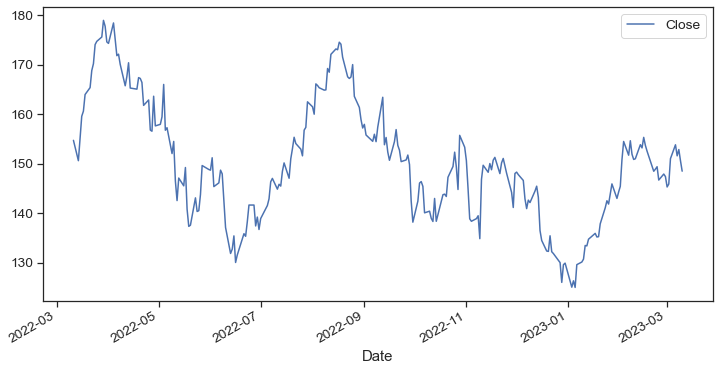

In [123]:
# Let's see a historical view of the closing price
AAPL['Close'].plot(legend=True, figsize = (12, 6))
plt.show()

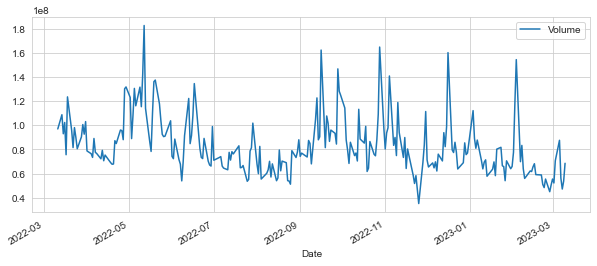

In [97]:
# Now let's plot the total volume of stock being traded each day over the past 12 Months
AAPL['Volume'].plot(legend=True,figsize=(10,4))
plt.show()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

### 2. 'Moving Average - MA'
A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

In [98]:
# Let's go ahead and plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name]=pd.DataFrame.rolling(AAPL['Close'],ma).mean()

Now let's go ahead and plot all the additional Moving Averages

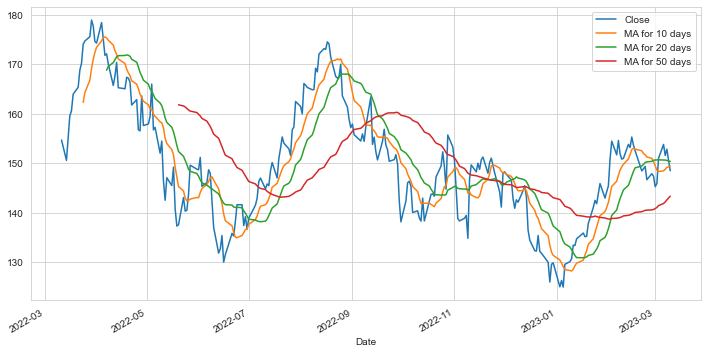

In [99]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,6))
plt.show()

### 3. Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices. Let’s say if the closing price of the stock yesterday was ₹500 and today the stock closed as ₹550. So, the percentage change is 10%. i.e. ((550–500) / 500)*100.

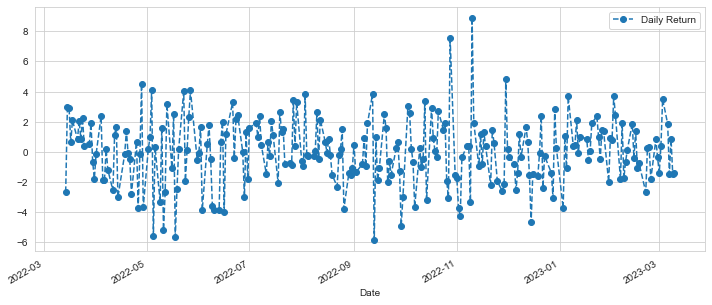

In [100]:
# use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()*100
# plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
plt.show()

It can be observed that for most of the days, the returns are between -4% to 4% with few spikes in between crossing 6% mark on both the sides.

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\msing\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


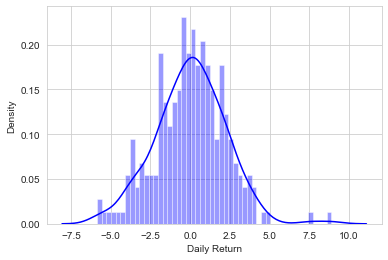

count    249.000000
mean       0.018653
std        2.212179
min       -5.867954
25%       -1.424602
50%        0.092795
75%        1.480269
max        8.897457
Name: Daily Return, dtype: float64

In [59]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=50,color='blue')
plt.show()
AAPL['Daily Return'].describe()

The daily returns histogram is centered about origin. For the past 1 year, the mean daily returns has been about 0.008 and for most of the days the daily return was less than 1% implying that the Apple stock has been less volatile over the period. During the period, the highest % change in positive direction was observed to be 8.89% and was 5.86% in negative direction. Clearly, we didn’t had any instances ‘bear drop’! but we do have instance of 'bull run'.

In [60]:
#You’ll notice that the first value in the Daily Return column is NaN. We’ll drop this row.
AAPL.dropna(axis = 0, inplace = True)

### 4. Trend Analysis
Next we add a new column ‘Trend’ whose values are based on the day-to-day percentage change we calculated above. Trend is determined from below relationship —

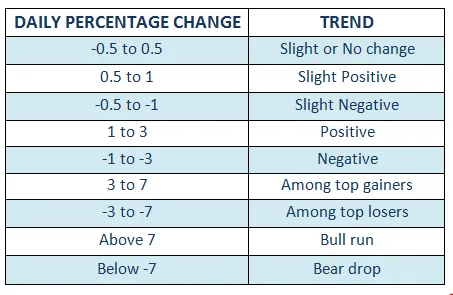

In [61]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return "Slight or No change"
  elif x > 0.5 and x <= 1:
    return "Slight Positive"
  elif x > -1 and x <= -0.5:
    return "Slight Negative"
  elif x > 1 and x <= 3:
    return "Positive"
  elif x > -3 and x <= -1:
    return "Negative"
  elif x > 3 and x <= 7:
    return "Among top gainers"
  elif x > -7 and x <= -3:
    return "Among top losers"
  elif x > 7:
    return "Bull run"
  elif x <= -7:
    return "Bear drop"
AAPL["Trend"]= np.zeros(AAPL["Daily Return"].count())
AAPL["Trend"]= AAPL["Daily Return"].apply(lambda x:trend(x))
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Trend,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,,
2022-05-23 00:00:00-04:00,137.789993,143.259995,137.649994,143.110001,142.457306,117726300,4.011923,Among top gainers,144.433000,151.428001,161.607200
2022-05-24 00:00:00-04:00,140.809998,141.970001,137.330002,140.360001,139.719849,104132700,-1.921599,Negative,143.018001,150.606001,161.402000
2022-05-25 00:00:00-04:00,138.429993,141.789993,138.339996,140.520004,139.879120,92482700,0.113995,Slight or No change,142.420001,149.803500,161.110601
2022-05-26 00:00:00-04:00,137.389999,144.339996,137.139999,143.779999,143.124252,90601500,2.319950,Positive,142.542001,148.810500,160.794401
2022-05-27 00:00:00-04:00,145.389999,149.679993,145.259995,149.639999,148.957520,90978500,4.075672,Among top gainers,142.795001,148.410001,160.574801


We wish to see how the stock was trending in past 12 months. This can be visualized as a pie chart, with each sector representing the percentage of days each trend occurred. We’ll plot a pie chart for the ‘Trend’ column to visualize the relative frequency of each trend category.

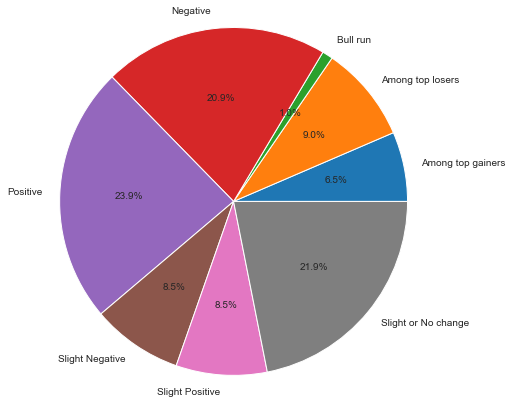

In [62]:
# using the groupby() function to aggregate all days with the same trend into a single group
AAPL_pie_data = AAPL.groupby('Trend')

#Visualizing Trend Frequency with Pie-Chart 
pie_label = sorted([i for i in AAPL.loc[:, 'Trend'].unique()])
plt.pie(AAPL_pie_data['Trend'].count(), labels = pie_label, 
        autopct = '%1.1f%%', radius = 2)

plt.show()

the Apple stock was among the top gainers for about 6.4% of the time, and among the top losers for 9.6 %. For about 24.0% of the time period, the stock has performed positively on a given day. Likewise, for most period of time (about 21.6%) the stock showed a very slight change in the price. 

### 5. Daily Returns and Volume

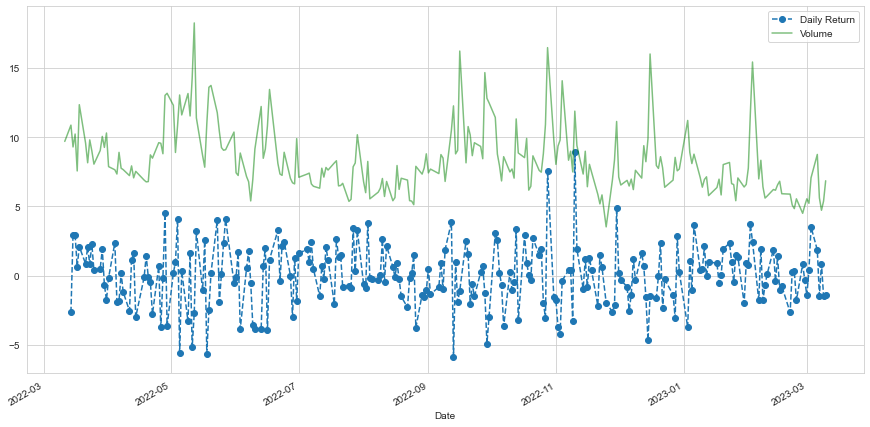

In [113]:
#Daily volume of trade has been reduced in scale to match with the daily return scale
AAPL['Daily Return'].plot(figsize=(12,5),legend=True,linestyle='--',marker='o')
(AAPL["Volume"]/10000000).plot(figsize = (15, 7.5),color = "green",alpha = 0.5, legend = True)
plt.show()

By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders & investors in a particular company.

### 6. Correlation Analysis Of Stocks with Pair plot and Joint plots

##### “Never put all your eggs in a single basket” #####

Whenever we go for the diversification of the portfolio, we would NOT want the stocks to be related to each other. Mathematically, Pearson’s correlation coefficient (also called Pearson’s R value) between any pair of stocks should be close to 0. The idea behind is simple — suppose your portfolio comprises of the stocks that are highly correlated, then if one stock tumbles, the others might fall too and you’re at the risk of losing all your investment!


Let's go ahead and build a DataFrame with all the ['close'] columns for each of the stocks dataframes.

In [127]:
closing_df1 = pd.DataFrame(AAPL['Close'])
close1  = closing_df1.rename(columns={"Close": "AAPL_Close"})

closing_df2 = pd.DataFrame(CVX['Close'])
close2  = closing_df2.rename(columns={"Close": "CVX_Close"})

closing_df3 = pd.DataFrame(BA['Close'])
close3  = closing_df3.rename(columns={"Close": "BA_Close"})

closing_df4 = pd.DataFrame(PG['Close'])
close4  = closing_df4.rename(columns={"Close": "PG_Close"})

Combined_df = pd.concat([close1, close2, close3, close4], axis=1)

#Drop null values and display first few rows —
Combined_df.dropna(inplace = True, axis = 0)
Combined_df.head()

,AAPL_Close,CVX_Close,BA_Close,PG_Close
Date,,,,
2022-03-11 00:00:00-05:00,154.729996,170.899994,176.229996,143.220001
2022-03-14 00:00:00-04:00,150.619995,166.720001,175.520004,145.050003
2022-03-15 00:00:00-04:00,155.089996,158.279999,179.889999,150.270004
2022-03-16 00:00:00-04:00,159.589996,157.710007,188.990005,149.759995
2022-03-17 00:00:00-04:00,160.619995,160.440002,190.190002,150.229996


Next we’ll analyse the correlation between the different stocks in a pair-wise fashion with Seaborn pairplot.

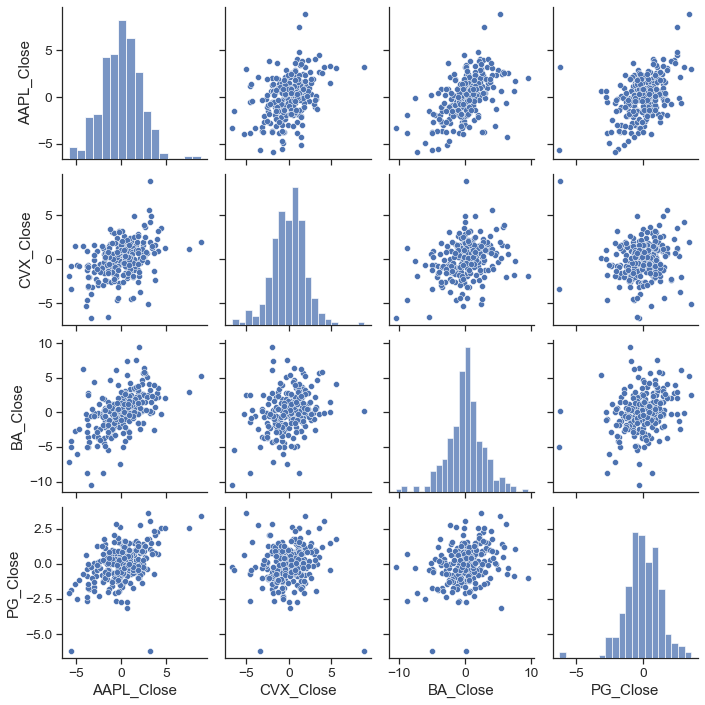

In [134]:
# store daily returns of all above stocks in a new dataframe 
pct_chg_df = Combined_df.pct_change()*100
pct_chg_df.dropna(inplace = True, how = "any", axis = 0)
# plotting pairplot  
import seaborn as sns
sns.set(style = "ticks", font_scale = 1.25)
sns.pairplot(pct_chg_df)

#### Takeaway:

Apple, Boeing, Chevron and Proctor and Gamble stocks can be included in a portfolio as no two stocks show any significant correlation.

#### Drawback:

Although the pair plots provide very good visualization of all possible combinations between the bunch of stocks, it doesn’t provide any detailed information like Pearson’s R value or null-hypothesis p value to quantify the correlation. That’s where the joint plot comes into the picture!

While Pair plot provides a visual insight into all possible correlations, Seaborn jointplot provides detailed information like Pearson’s R value (Pearson’s correlation coefficient) for each pair of stocks. Pearson’s R value ranges from -1 to 1. Negative value indicates a negative linear relation between the variables, while positive value indicates a positive relationship. Pearson’s R value closer to 1 (or -1) indicates strong correlation, while value closer to 0 indicates weak correlation.

In addition to Pearson’s R value, joint plot also shows the respective histograms on the edges as well as null hypothesis p-value.

Here’s an example of a joint plots between the stocks of Apple vs Chevron and Chevron vs Boeing —

C:\Users\msing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\msing\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


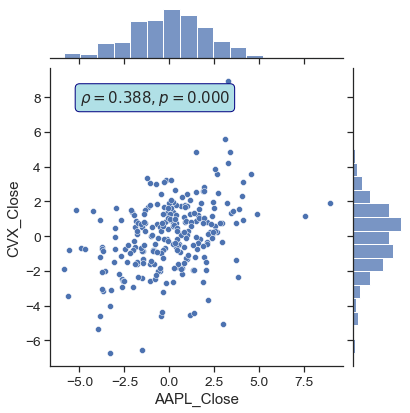

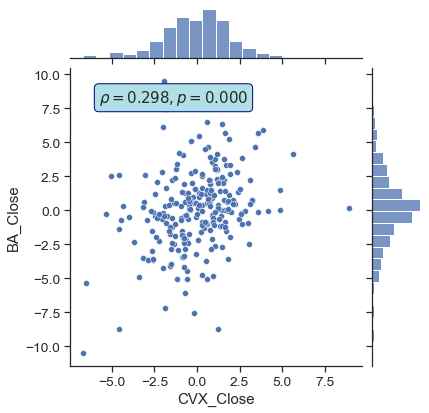

In [151]:
from scipy.stats import stats
#Jointplot between the stocks of Apple vs Chevron
g = sns.jointplot('AAPL_Close', 'CVX_Close', pct_chg_df, kind = 'scatter')
r, p = stats.pearsonr(pct_chg_df['AAPL_Close'], pct_chg_df['CVX_Close'])
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})


#Jointplot between the stocks fo Chevron vs Boeing
h = sns.jointplot('CVX_Close', 'BA_Close', pct_chg_df, kind = 'scatter')
s, t = stats.pearsonr(pct_chg_df['CVX_Close'], pct_chg_df['BA_Close'])
h.ax_joint.annotate(f'$\\rho = {s:.3f}, p = {t:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
plt.show()

#### Takeaways:

* The Pearson’s R value is 0.388 for Apple v/s Chevron which is very less. This indicates a weak correlation.
* Similarly, the Pearson’s R value is observed to be 0.298 in case of Chevron v/s Boeing indicating weak correlation.

These above results from Joint plots equip us with the numerical figures to ascertain the insights we derived by visually observing the Pair plot previously.

### 7. Volatility analysis

Volatility is one of the most important pillars in financial markets. A stock is said to have high volatility if its value can change dramatically within a short span of time. On other hand, lower volatility means that value of stock tends to be relatively steady over a period of time. Mathematically, volatility is measured using a statistical measure called ‘standard deviation’, which measures an asset’s departure from its average value.

Next we’ll see the comparative volatility analysis of Boeing stock with Procter and Gamble stock

<AxesSubplot:xlabel='Date'>

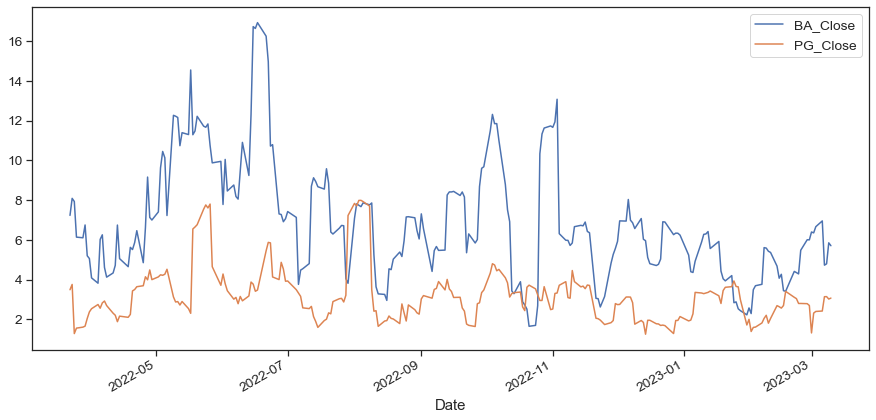

In [155]:
# Computing 7-day rolling mean, and standard deviation, all in a single line of code
volatility = pct_chg_df[['BA_Close', 'PG_Close']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (15, 7))

You can observe that Boeing stock has higher volatility as compared to Proctor and Gamble.

Many traders and investors seek out higher volatility investments in order to make higher profits. If a stock does not move, not only it has low volatility, but also it has low gain potential. On the other hand, a stock or other security with a very high volatility level can have tremendous profit potential, but the risk is equally high.

### Endnotes
There is no full-proof strategy that can guarantee profit on your investment. In the real-world, there are a number of factors that traders take into account before making an investment. By using the right strategies and techniques, we can only improve our chances. I am looking forward to introduce some of these strategies & techniques along with demonstration using python in my subsequent articles.